<a href="https://colab.research.google.com/github/Devraj02-sys/AI-ML-project/blob/main/plagiarism_checker_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Loaded Successfully
                                               Text1  \
0  A person on a horse jumps over a broken down a...   
1  A person on a horse jumps over a broken down a...   
2              Children smiling and waving at camera   
3              Children smiling and waving at camera   
4  A boy is jumping on skateboard in the middle o...   

                                           Text2  Class  
0  A person is at a diner, ordering an omelette.      0  
1              A person is outdoors, on a horse.      1  
2                     There are children present      1  
3                          The kids are frowning      0  
4              The boy skates down the sidewalk.      0  


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.7016822162791172
Testing Accuracy: 0.6868730860837019
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.66      0.68     36795
           1       0.68      0.71      0.69     36680

    accuracy                           0.69     73475
   macro avg       0.69      0.69      0.69     73475
weighted avg       0.69      0.69      0.69     73475



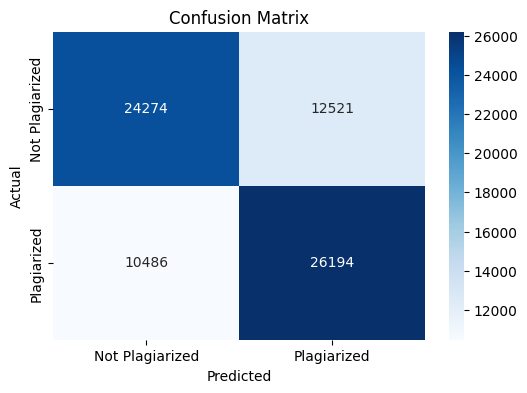

Prediction: Plagiarized


In [22]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
dataset_path = "/content/Plagiarism-MIT-Detection.csv"  # Update this path

df = pd.read_csv(dataset_path, delimiter="\t", header=None)
df = df[0].str.split("\t", expand=True)
df.columns = ["Text1", "Text2", "Class"]
df["Class"] = df["Class"].astype(int)

print("Dataset Loaded Successfully")
print(df.head())

# Data Preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    return text

df['Text1'] = df['Text1'].astype(str).apply(clean_text)
df['Text2'] = df['Text2'].astype(str).apply(clean_text)

# Combine text pairs for feature extraction
df['Combined'] = df['Text1'] + " " + df['Text2']

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(df['Combined'])
y = df['Class']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate Model
y_pred = model.predict(X_test)
print("Training Accuracy:", model.score(X_train, y_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Plagiarized", "Plagiarized"], yticklabels=["Not Plagiarized", "Plagiarized"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Function to Check Plagiarism
def check_plagiarism(text1, text2):
    text1_cleaned = clean_text(text1)
    text2_cleaned = clean_text(text2)
    text_combined = text1_cleaned + " " + text2_cleaned
    text_vectorized = tfidf.transform([text_combined])
    prediction = model.predict(text_vectorized)
    return "Plagiarized" if prediction == 1 else "Not Plagiarized"

# Example Usage
sample_text1 = "A person is riding a horse."
sample_text2 = "Someone is on horseback outdoors."
print("Prediction:", check_plagiarism(sample_text1, sample_text2))